# Coding Assignment 10

### *Handwritten Digit Recognition*

### *Author : Sreehari Sreenath*

### Reference :

1. #### [MNIST Handwritten Digit Recognition in Keras](https://nextjournal.com/gkoehler/digit-recognition-with-keras)

2. ####  [Handwritten Digit Recognition using Convolutional Neural Networks in Python with Keras](https://machinelearningmastery.com/handwritten-digit-recognition-using-convolutional-neural-networks-python-keras/)




In [219]:
# Importing the libraries 
from keras.models import Sequential, load_model
from keras.layers.core import Dense, Dropout, Activation
from keras.utils import np_utils
import matplotlib.pyplot as plt
import numpy as np

## Load File 

In [220]:
# loads the MNIST(Modified National Institute of Standards and Technology dataset)
from keras.datasets import mnist

## Performing the Train-Test spilt

In [221]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

## Visualizing the MNIST data

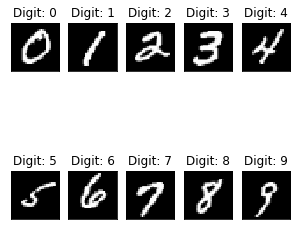

In [222]:
count  = 0
index = 0
plt.figure(figsize=(5,5))  
while count != 10:
  if y_train[index] == count:
    plt.subplot(2,5,count+1)
    plt.imshow(X_train[index], cmap='gray', interpolation='none')
    plt.title("Digit: {}".format(y_train[index]))
    plt.xticks([])
    plt.yticks([])
    count += 1
  else:
    index += 1


##  Reshaping and normalizing the data

In [223]:
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

#normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255

## Encoding the categories using one-hot encoding

In [224]:
n_classes = 10
Y_train = np_utils.to_categorical(y_train, n_classes)
Y_test = np_utils.to_categorical(y_test, n_classes)

## Creating the baseline model

In [225]:
model = Sequential()
model.add(Dense(512, input_shape=(784,)))
model.add(Activation('relu'))                            
model.add(Dropout(0.2))

model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(10))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

## Fit the model

In [226]:
history = model.fit(X_train, Y_train,
          batch_size=128, epochs=20,
          verbose=2,
          validation_data=(X_test, Y_test))

Epoch 1/20
469/469 - 7s - loss: 0.2491 - accuracy: 0.9245 - val_loss: 0.1103 - val_accuracy: 0.9642
Epoch 2/20
469/469 - 7s - loss: 0.1016 - accuracy: 0.9690 - val_loss: 0.0854 - val_accuracy: 0.9733
Epoch 3/20
469/469 - 7s - loss: 0.0700 - accuracy: 0.9775 - val_loss: 0.0661 - val_accuracy: 0.9795
Epoch 4/20
469/469 - 7s - loss: 0.0543 - accuracy: 0.9826 - val_loss: 0.0731 - val_accuracy: 0.9772
Epoch 5/20
469/469 - 7s - loss: 0.0442 - accuracy: 0.9856 - val_loss: 0.0613 - val_accuracy: 0.9824
Epoch 6/20
469/469 - 7s - loss: 0.0406 - accuracy: 0.9869 - val_loss: 0.0725 - val_accuracy: 0.9787
Epoch 7/20
469/469 - 7s - loss: 0.0349 - accuracy: 0.9883 - val_loss: 0.0586 - val_accuracy: 0.9818
Epoch 8/20
469/469 - 7s - loss: 0.0325 - accuracy: 0.9891 - val_loss: 0.0725 - val_accuracy: 0.9793
Epoch 9/20
469/469 - 7s - loss: 0.0274 - accuracy: 0.9907 - val_loss: 0.0693 - val_accuracy: 0.9817
Epoch 10/20
469/469 - 7s - loss: 0.0239 - accuracy: 0.9923 - val_loss: 0.0727 - val_accuracy: 0.9799

### Evaluating the metrics

#### Plotting the metrics


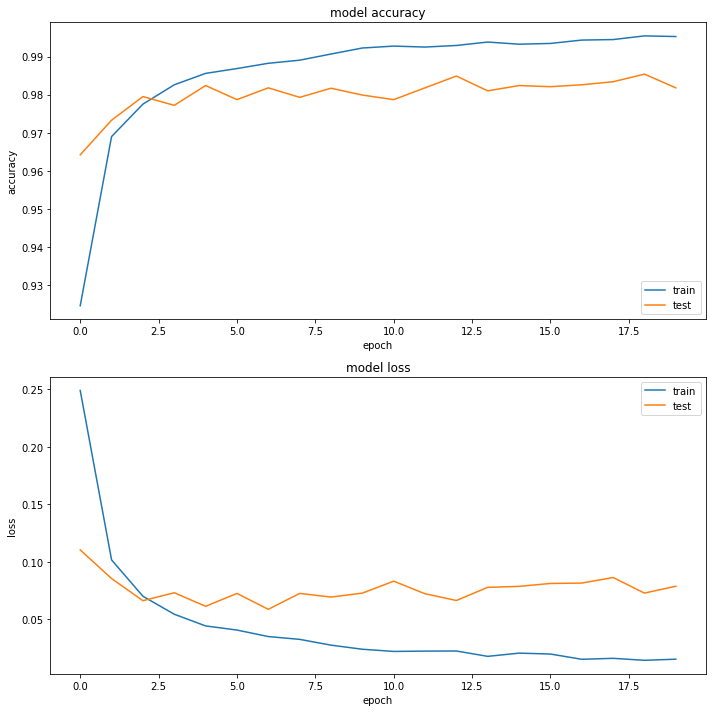

In [227]:
plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.tight_layout()

#### Getting the accuracy and loss

In [230]:
scores = model.evaluate(X_test, Y_test, verbose=2)
print("Test Loss is %.4f" % scores[0])
print("Test Accuracy is %.4f" % scores[1])
print("Error: %.2f%%" % (100-scores[1]*100))

313/313 - 1s - loss: 0.0787 - accuracy: 0.9818
Test Loss is 0.0787
Test Accuracy is 0.9818
Error: 1.82%


#### Getting the examples of correctly & incorrectly predictions 


9818  classified correctly
182  classified incorrectly


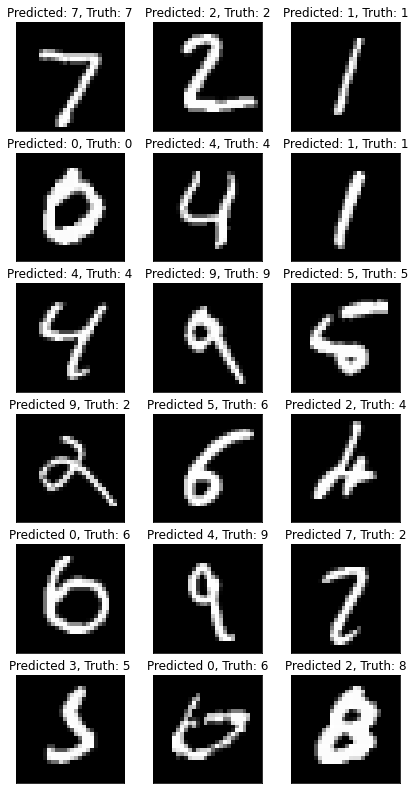

In [229]:
predicted_classes = model.predict_classes(X_test)

# see which we predicted correctly and which not
correct_indices = np.nonzero(predicted_classes == y_test)[0]
incorrect_indices = np.nonzero(predicted_classes != y_test)[0]
print()
print(len(correct_indices)," classified correctly")
print(len(incorrect_indices)," classified incorrectly")

# adapt figure size to accomodate 18 subplots
plt.rcParams['figure.figsize'] = (7,14)
figure_evaluation = plt.figure()




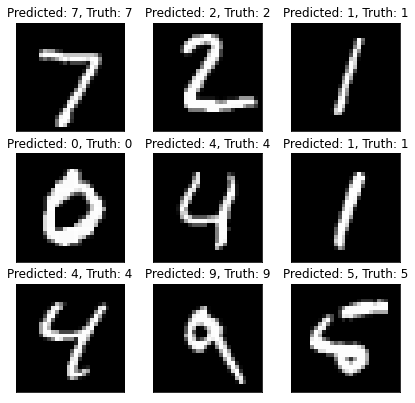

In [231]:
# plot 9 correct predictions
for i, correct in enumerate(correct_indices[:9]):
    plt.subplot(6,3,i+1)
    plt.imshow(X_test[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title(
      "Predicted: {}, Truth: {}".format(predicted_classes[correct],
                                        y_test[correct]))
    plt.xticks([])
    plt.yticks([])

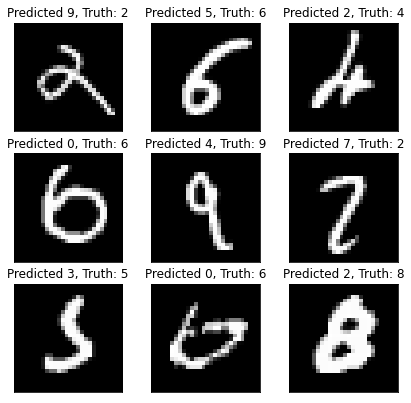

In [232]:

# plot 9 incorrect predictions
for i, incorrect in enumerate(incorrect_indices[:9]):
    plt.subplot(6,3,i+10)
    plt.imshow(X_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title(
      "Predicted {}, Truth: {}".format(predicted_classes[incorrect], 
                                       y_test[incorrect]))
    plt.xticks([])
    plt.yticks([])